# Schema's 

```
COMPETITIONS: 
CREATE TABLE Competitions (
    CompetitionId SERIAL,
    HLTVCompetitionId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    CompetitionName VARCHAR(300),
    Slug VARCHAR(300),
    TeamsCompeting SMALLINT,
    PrizePool INTEGER,
    CompetitionLocation VARCHAR(100),
    StartDate DATE,
    EndDate DATE,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (CompetitionId)
);
DEMOS: 
CREATE TABLE Demos (
    MatchId BIGINT UNSIGNED NOT NULL,
    MapName VARCHAR(20),
    WinnerId BIGINT UNSIGNED NOT NULL,
    WinnerScore SMALLINT,
    WinnerFirstHalfScore SMALLINT,
    WinnerSecondHalfScore SMALLINT,
    WinnerFirstHalfSide VARCHAR(2),
    WinnerOTScore SMALLINT DEFAULT 0,
    LoserId BIGINT UNSIGNED NOT NULL,
    LoserScore SMALLINT,
    LoserFirstHalfScore SMALLINT,
    LoserSecondHalfScore SMALLINT,
    LoserFirstHalfSide VARCHAR(2),
    LoserOTScore SMALLINT DEFAULT 0,
    DemoParsed BOOLEAN DEFAULT false NOT NULL,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId, MapName),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (WinnerId) REFERENCES Teams(TeamId),
    FOREIGN KEY (LoserId) REFERENCES Teams(TeamId)
);
MAP SELECTIONS: 
CREATE TABLE Map_Selections (
    MatchId BIGINT UNSIGNED NOT NULL,
    MapName VARCHAR(20),
    DecisionOrder SMALLINT,
    DecisionTeamId BIGINT UNSIGNED NOT NULL,
    OtherTeamId BIGINT UNSIGNED NOT NULL,
    Decision VARCHAR(20),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (
        MatchId,
        MapName,
        DecisionTeamId,
        OtherTeamId,
        Decision
    ),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (DecisionTeamId) REFERENCES Teams(TeamId),
    FOREIGN KEY (OtherTeamId) REFERENCES Teams(TeamId)
);
MATCHES: 
CREATE TABLE Matches (
    MatchId SERIAL,
    HLTVMatchId INT UNIQUE,
    CompetitionId BIGINT UNSIGNED,
    HLTVLink VARCHAR(300) UNIQUE,
    MatchType VARCHAR(14),
    MatchDate DATE,
    MatchTime TIME,
    Stars SMALLINT DEFAULT 0,
    Slug VARCHAR(100) DEFAULT NULL,
    WinnerId BIGINT UNSIGNED NOT NULL,
    WinnerScore SMALLINT DEFAULT 0,
    LoserId BIGINT UNSIGNED NOT NULL,
    LoserScore SMALLINT DEFAULT 0,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId),
    FOREIGN KEY (CompetitionId) REFERENCES Competitions(CompetitionId),
    FOREIGN KEY (WinnerId) REFERENCES Teams(TeamId),
    FOREIGN KEY (LoserId) REFERENCES Teams(TeamId)
);
PLAYER DEMOS: 
CREATE TABLE PlayerDemos (
    MatchId BIGINT UNSIGNED,
    PlayerId BIGINT UNSIGNED,
    TeamId BIGINT UNSIGNED,
    MapName VARCHAR(20),
    Side VARCHAR(3),
    Kills SMALLINT,
    Deaths SMALLINT,
    ADR FLOAT,
    KAST FLOAT,
    HLTVRating FLOAT,
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (MatchId, PlayerId, TeamId, MapName, Side),
    FOREIGN KEY (MatchId) REFERENCES Matches(MatchId),
    FOREIGN KEY (PlayerId) REFERENCES Players(PlayerId),
    FOREIGN KEY (TeamId) REFERENCES Teams(TeamId)
);
PLAYERS: 
CREATE TABLE Players (
    PlayerId SERIAL,
    HLTVPlayerId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    Country VARCHAR(100),
    RealName VARCHAR(100),
    PlayerName VARCHAR(50),
    Facebook VARCHAR(300),
    Twitter VARCHAR(300),
    Twitch VARCHAR(300),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (PlayerId)
);
TEAMS: 
CREATE TABLE Teams (
    TeamId SERIAL,
    HLTVTeamId INTEGER UNIQUE,
    HLTVLink VARCHAR(300) UNIQUE,
    TeamName VARCHAR(200),
    Country VARCHAR(100),
    Twitter VARCHAR(300),
    Facebook VARCHAR(300),
    Created TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
    Updated TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE NOW(),
    PRIMARY KEY (TeamId)
);
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections


In [2]:
cols_competitions = [
    'CompetitionId',
    'HLTVCompetitionId',
    'HLTVLink' ,
    'CompetitionName' ,
    'Slug',
    'TeamsCompeting' ,
    'PrizePool' ,
    'CompetitionLocation',
    'StartDate' ,
    'EndDate' ,
    'Created',
    'Updated',]
cols_demos = [
    'MatchId',
    'MapName' ,
    'WinnerId' ,
    'WinnerScore' ,
    'WinnerFirstHalfScore' ,
    'WinnerSecondHalfScore' ,
    'WinnerFirstHalfSide' ,
    'WinnerOTScore' ,
    'LoserId' ,
    'LoserScore' ,
    'LoserFirstHalfScore' ,
    'LoserSecondHalfScore' ,
    'LoserFirstHalfSide' ,
    'LoserOTScore' ,
    'DemoParsed' ,
    'Created' ,
    'Updated']
cols_map_picks = [
    'MatchId',
    'MapName',
    'DecisionOrder',
    'DecisionTeamId',
    'OtherTeamId',
    'Decision',
    'Created',
    'Updated']
cols_matches = [
    'MatchId',
    'HLTVMatchId',
    'CompetitionId',
    'HLTVLink',
    'MatchType',
    'MatchDate',
    'MatchTime',
    'Stars',
    'Slug',
    'WinnerId',
    'WinnerScore',
    'LoserId',
    'LoserScore',
    'Created',
    'Updated']
cols_player_demo = [
    'MatchId',
    'PlayerId' ,
    'TeamId' ,
    'MapName' ,
    'Side' ,
    'Kills',
    'Deaths' ,
    'ADR FLOAT',
    'KAST FLOAT',
    'HLTVRating' ,
    'Created',
    'Updated']

cols_players = [
    'PlayerId',
    'HLTVPlayerId',
    'HLTVLink',
    'Country' ,
    'RealName' ,
    'PlayerName',
    'Facebook',
    'Twitter',
    'Twitch']

cols_teams = [
    'TeamId',
    'HLTVTeamId',
    'HLTVLink',
    'TeamName',
    'Country',
    'Twitter',
    'Facebook',
    'Created',
    'Updated']

data_dir = 'data/'

competitions = pd.read_csv(data_dir+'competitions.csv',names = cols_competitions)
demos = pd.read_csv(data_dir+'demos.csv',names = cols_demos)
map_picks = pd.read_csv(data_dir+'map_picks.csv',names = cols_map_picks)
matches = pd.read_csv(data_dir+'matches.csv',names = cols_matches)
player_demos = pd.read_csv(data_dir+'player_demos.csv',names = cols_player_demo)
players = pd.read_csv(data_dir+'players.csv',names = cols_players)
teams = pd.read_csv(data_dir+'teams.csv',names = cols_teams)


# Games Per month

In [3]:
match_dates = pd.to_datetime(matches['MatchDate'])

In [4]:
print(match_dates.max())
print(match_dates.min())

2021-04-01 00:00:00
2020-03-31 00:00:00


Text(0, 0.5, 'count')

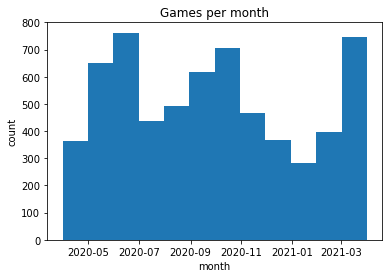

In [5]:
plt.hist(pd.to_datetime(matches['MatchDate']),bins=12)
plt.title('Games per month')
plt.xlabel('month')
plt.ylabel('count')

Probably should split last two-three months off as test set

# Looking at Matches  (Note: not games)

### Winloss_df

In [6]:
wins_df = matches['WinnerId'].value_counts().reset_index().rename(columns={'index' : 'TeamId','WinnerId' : 'Wins'})
losses_df = matches['LoserId'].value_counts().reset_index().rename(columns={'index' : 'TeamId','LoserId' : 'Losses'})

winloss_df = wins_df.merge(losses_df,on = 'TeamId',how = 'outer').fillna(0)
winloss_df['total'] = winloss_df['Wins'] + winloss_df['Losses']
winloss_df = winloss_df.sort_values(by='total',ascending=False)

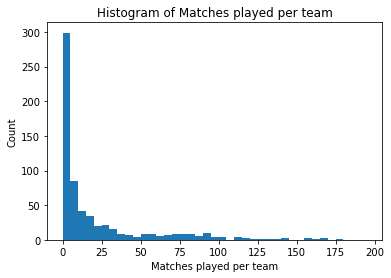

In [7]:
plt.hist(winloss_df['total'],bins=np.arange(0,200,5))
plt.title('Histogram of Matches played per team')
plt.xlabel('Matches played per team')
plt.ylabel('Count')

plt.show()

In [8]:
cutoff =10

team_ids_over_cutoff = winloss_df[winloss_df['total']>=cutoff]['TeamId']
print(len(team_ids_over_cutoff))

244


628 Unique Teams (with matches played) in the dataset. Note: 'Teams' dataframe containts 636 teams.
244 Unique Teams with more than 10 matches played.

# Repeated Team Matchups


In [9]:
def create_both_team_ids(match_row):
    team1_id = match_row['WinnerId']
    team2_id = match_row['LoserId']
    if team1_id < team2_id:
        both_team_ids = str(team1_id) + '+' + str(team2_id)
    else:
        both_team_ids = str(team2_id) + '+' + str(team1_id)

    return both_team_ids
    

In [10]:
matches_adj = matches[['WinnerId','LoserId']]


In [11]:
# Replace all teams that didn't play enough games with TeamID=0.
# One can think of TeamId = 0 as a "pro team with no/minimal history"
matches_adj.loc[~matches_adj['WinnerId'].isin(team_ids_over_cutoff),'WinnerId'] = 0
matches_adj.loc[~matches_adj['LoserId'].isin(team_ids_over_cutoff),'LoserId'] = 0

E:\miniconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
E:\miniconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
matches_adj['BothTeamIds'] = matches_adj.apply(create_both_team_ids,axis=1)

<ipython-input-12-34371418dcc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_adj['BothTeamIds'] = matches_adj.apply(create_both_team_ids,axis=1)


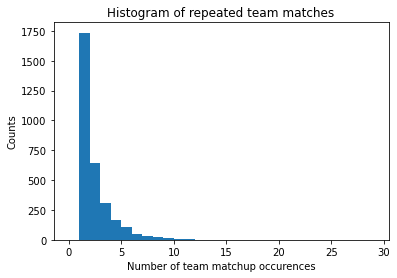

In [13]:
plt.hist(matches_adj['BothTeamIds'].value_counts(),bins=np.arange(0,30,1))
plt.title('Histogram of repeated team matches')
plt.xlabel('Number of team matchup occurences')
plt.ylabel('Counts')
plt.show()


In [14]:
matches_reduced=matches.copy()
matches_reduced = matches_reduced[matches_reduced['WinnerId'].isin(team_ids_over_cutoff) | matches_reduced['LoserId'].isin(team_ids_over_cutoff)]
matches_reduced['BothTeamIds'] = matches_reduced.apply(create_both_team_ids,axis=1)

In [15]:
matches_reduced.BothTeamIds.nunique()

3579

# Trying to get a sense of possible uneven distribution of games in train vs test set

### not going to finish this

In [16]:
team_id_many_games = winloss_df.head(20)['TeamId']

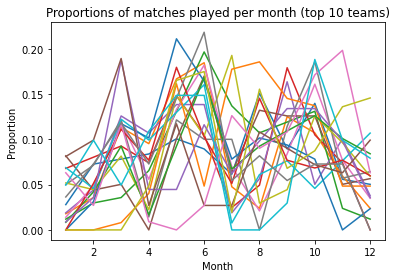

In [17]:
matches['MatchDate'] = pd.to_datetime(matches['MatchDate'])
matches['MatchMonth'] = matches['MatchDate'].dt.month
prop_list = []
for team_id in team_id_many_games:
    team_matches = matches[(matches['WinnerId']==team_id) | (matches['LoserId'] == team_id)] 
    team_prop = team_matches['MatchMonth'].value_counts(normalize=True)
    prop_list.append(team_prop.reset_index().set_index('index'))
prop_df  = pd.concat(prop_list,axis=1).transpose().fillna(0)
for (name, row) in prop_df.iterrows():
    plt.plot(row)
plt.title('Proportions of matches played per month (top 10 teams)')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.show()

# Figuring out Best of 3s and 5s
Recommendation: Drop all the games that don't have 7 decision

In [18]:
decision_counts = map_picks.groupby('MatchId').count()['MapName']
decision_counts.value_counts()

7    6202
6      37
4      17
1       1
Name: MapName, dtype: int64

Recommendation: Drop all the games that don't have 7 decision

In [19]:
decision_counts[decision_counts==6].head()

MatchId
57      6
390     6
570     6
731     6
1198    6
Name: MapName, dtype: int64

In [20]:
decision_counts[decision_counts==4].head()

MatchId
184    4
188    4
201    4
204    4
271    4
Name: MapName, dtype: int64

In [21]:
decision_counts[decision_counts==1].head()

MatchId
1236    1
Name: MapName, dtype: int64

### Best of 5

In [22]:
map_picks[map_picks['MatchId']==57]

,MatchId,MapName,DecisionOrder,DecisionTeamId,OtherTeamId,Decision,Created,Updated
385,57,de_dust2,4,80,63,Pick,2021-04-09 19:12:58,2021-04-09 19:12:58
386,57,de_inferno,3,63,80,Pick,2021-04-09 19:12:58,2021-04-09 19:12:58
387,57,de_mirage,1,63,80,Remove,2021-04-09 19:12:58,2021-04-09 19:12:58
388,57,de_nuke,6,80,63,Pick,2021-04-09 19:12:58,2021-04-09 19:12:58
389,57,de_overpass,5,63,80,Pick,2021-04-09 19:12:58,2021-04-09 19:12:58
390,57,de_vertigo,2,80,63,Remove,2021-04-09 19:12:58,2021-04-09 19:12:58


### Not sure whats happening here: Best of 3 with random last map?

In [23]:
map_picks[map_picks['MatchId']==184]

,MatchId,MapName,DecisionOrder,DecisionTeamId,OtherTeamId,Decision,Created,Updated
1273,184,de_inferno,3,118,120,Pick,2021-04-09 19:17:33,2021-04-09 19:17:33
1274,184,de_mirage,2,120,118,Remove,2021-04-09 19:17:33,2021-04-09 19:17:33
1275,184,de_nuke,1,118,120,Remove,2021-04-09 19:17:33,2021-04-09 19:17:33
1276,184,de_overpass,4,120,118,Pick,2021-04-09 19:17:33,2021-04-09 19:17:33


### Probably should just drop this match

In [24]:
map_picks[map_picks['MatchId']==1236]

,MatchId,MapName,DecisionOrder,DecisionTeamId,OtherTeamId,Decision,Created,Updated
8553,1236,de_train,1,79,51,Remove,2021-04-09 19:51:46,2021-04-09 19:51:46


# Round analysis

In [25]:
# Drop all non-standard Bo3 games
standard_bo3_match_ids = decision_counts[decision_counts==7].index
demos_bo3 = demos[demos['MatchId'].isin(standard_bo3_match_ids)]
print('Total of {} games'.format(len(demos_bo3)))

Total of 12969 games


### NOTE: Winner in this table refers to the MATCH winner, NOT the game winner

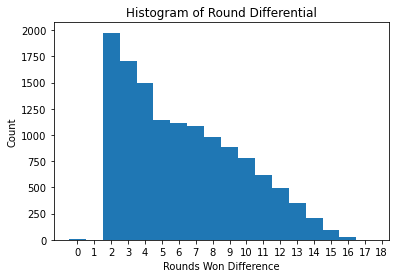

In [26]:
plt.hist(abs(demos_bo3['WinnerScore'] - demos_bo3['LoserScore']),bins=np.arange(19)-.5)
plt.title('Histogram of Round Differential')
plt.xlabel('Rounds Won Difference')
plt.ylabel('Count')
plt.xticks(np.arange(19))
plt.show()

In [27]:
demos_bo3[demos_bo3['WinnerScore']==demos_bo3['LoserScore']]

,MatchId,MapName,WinnerId,WinnerScore,WinnerFirstHalfScore,WinnerSecondHalfScore,WinnerFirstHalfSide,WinnerOTScore,LoserId,LoserScore,LoserFirstHalfScore,LoserSecondHalfScore,LoserFirstHalfSide,LoserOTScore,DemoParsed,Created,Updated
2112,1073,de_inferno,164,15,9,6,T,0,165,15,6,9,CT,0,0,2021-04-09 19:46:34,2021-04-09 19:46:34
2152,1101,de_train,165,15,6,9,T,0,162,15,9,6,CT,0,0,2021-04-09 19:47:25,2021-04-09 19:47:25
2179,1121,de_inferno,49,15,6,9,CT,0,42,15,9,6,T,0,0,2021-04-09 19:48:03,2021-04-09 19:48:03
2200,1136,de_train,36,15,8,7,CT,0,4,15,7,8,T,0,0,2021-04-09 19:48:32,2021-04-09 19:48:32
2215,1148,de_nuke,44,15,12,3,CT,0,158,15,3,12,T,0,1,2021-04-09 19:48:51,2021-04-09 19:53:21
2216,1149,de_train,49,15,12,3,CT,0,75,15,3,12,T,0,0,2021-04-09 19:48:55,2021-04-09 19:48:55
2248,1169,de_dust2,56,15,7,8,T,0,158,15,8,7,CT,0,0,2021-04-09 19:49:34,2021-04-09 19:49:34


Seems like there are some games that have no tiebreak? or overtime?

In [28]:
ot_games = demos_bo3[(demos_bo3['WinnerOTScore']>0 )| (demos_bo3['LoserOTScore']>0)]
print('Percent of overtime games: {}'.format(len(ot_games)/len(demos_bo3)))

Percent of overtime games: 0.1085665818490246


# Player Consistency

Says theres only 619 unique teams... hmmm...

In [98]:
def plot_attendance(team_id):
    team_matches = player_demos[player_demos['TeamId']==team_id]
    unique_players_list = team_matches['PlayerId'].unique()
    match_id_to_players_df = team_matches.groupby('MatchId')['PlayerId'].unique().reset_index().rename(columns={'PlayerId' : 'PlayerIds'})
    player_id_to_attended_tuple_dict= collections.defaultdict(lambda: ([],[]) )
    for player_id in unique_players_list:
        for idx, row in match_id_to_players_df.iterrows():
            played_flag = int(player_id in row['PlayerIds'])
            match_date = matches[matches['MatchId'] == row['MatchId']]['MatchDate'].iloc[0]
            player_id_to_attended_tuple_dict[player_id][0].append(match_date)
            player_id_to_attended_tuple_dict[player_id][1].append(played_flag)
            
    
    fig,ax = plt.subplots()
    jitter = np.linspace(0,stop=.02*(len(unique_players_list)-1),num=len(unique_players_list))
    for ii,(player_id, (date,attended)) in enumerate(player_id_to_attended_tuple_dict.items()):
        
        sort_idx =  np.argsort(date,)
        x = np.sort(date)
        y = [attended[jj] for jj in sort_idx]
        plt.plot(x,y+jitter[ii],label=player_id)
    
    plt.title('Attendance Graph for Team {}'.format(team_id))
    plt.xlabel('Date')
    plt.ylabel('Attended (boolean)')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return player_id_to_attended_tuple_dict

In [114]:
top_team_ids = winloss_df.sort_values(by='total',ascending=False).head(10)['TeamId']

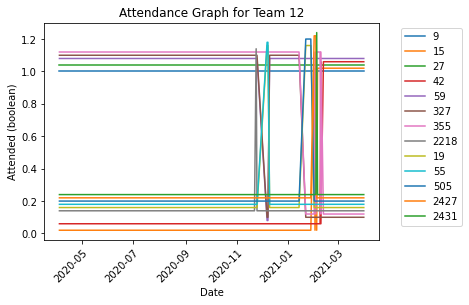

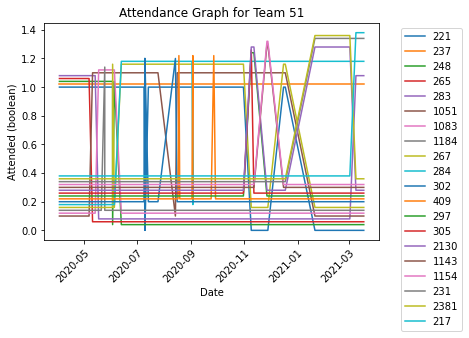

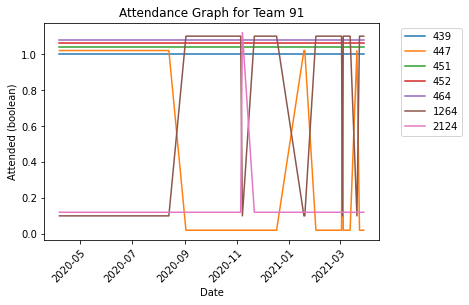

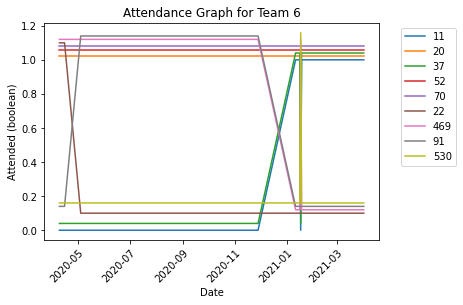

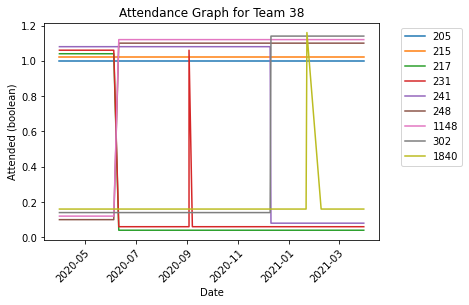

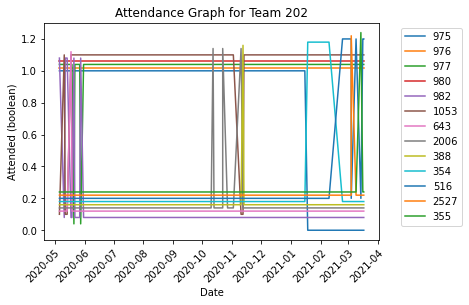

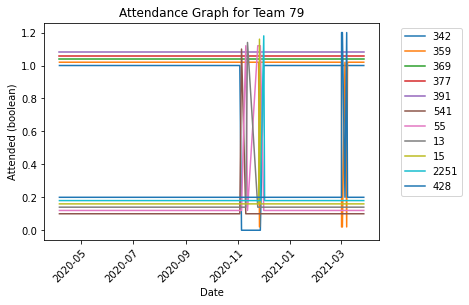

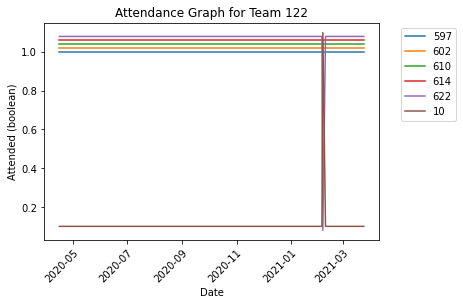

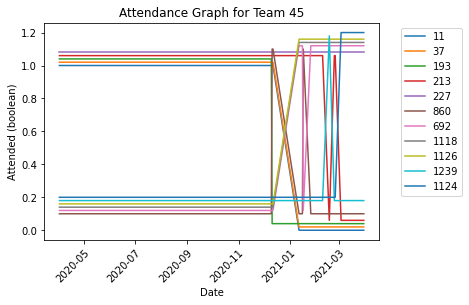

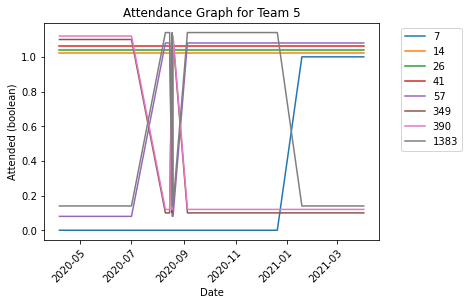

In [115]:
for team_id in top_team_ids:
    plot_attendance(team_id)
    

# Win Percentages

In [116]:
demos.groupby('MapName')['WinnerFirstHalfScore,WinnerSecondHalfScore']

,MatchId,MapName,WinnerId,WinnerScore,WinnerFirstHalfScore,WinnerSecondHalfScore,WinnerFirstHalfSide,WinnerOTScore,LoserId,LoserScore,LoserFirstHalfScore,LoserSecondHalfScore,LoserFirstHalfSide,LoserOTScore,DemoParsed,Created,Updated
0,1,de_inferno,3,16,7,9,T,0,1,11,8,3,CT,0,1,2021-04-09 18:45:37,2021-04-09 18:50:56
1,1,de_nuke,3,16,9,7,T,0,1,14,6,8,CT,0,1,2021-04-09 18:45:37,2021-04-09 18:50:28
2,2,de_dust2,3,16,11,5,CT,0,2,13,4,9,T,0,1,2021-04-09 18:45:39,2021-04-09 18:50:03
3,2,de_vertigo,3,16,8,8,CT,0,2,10,7,3,T,0,0,2021-04-09 18:45:39,2021-04-09 18:45:39
4,3,de_inferno,2,16,4,12,CT,0,7,13,11,2,T,0,1,2021-04-09 18:45:44,2021-04-09 18:50:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,6281,de_overpass,41,16,10,6,CT,0,394,8,5,3,T,0,0,2021-04-09 22:42:09,2021-04-09 22:42:09
13150,6282,de_inferno,8,16,7,9,T,0,23,12,8,4,CT,0,0,2021-04-09 22:42:10,2021-04-09 22:42:10
13151,6282,de_nuke,8,16,12,4,CT,0,23,3,3,0,T,0,0,2021-04-09 22:42:10,2021-04-09 22:42:10
13152,6283,de_nuke,30,16,12,4,T,0,638,10,3,7,CT,0,0,2021-04-09 22:42:11,2021-04-09 22:42:11


In [140]:
demos_small = demos[['MatchId','MapName','WinnerFirstHalfScore','WinnerSecondHalfScore','WinnerFirstHalfSide','LoserFirstHalfScore','LoserSecondHalfScore','LoserFirstHalfSide']].copy()\
              .rename(columns={'WinnerFirstHalfScore':'TeamAFirstScore'
                              
                              
                              })

In [141]:
def flip(x):
    if x == 'T':
        return 'CT'
    else:
        return 'T'

In [154]:
demos

,MatchId,MapName,WinnerId,WinnerScore,WinnerFirstHalfScore,WinnerSecondHalfScore,WinnerFirstHalfSide,WinnerOTScore,LoserId,LoserScore,LoserFirstHalfScore,LoserSecondHalfScore,LoserFirstHalfSide,LoserOTScore,DemoParsed,Created,Updated
0,1,de_inferno,3,16,7,9,T,0,1,11,8,3,CT,0,1,2021-04-09 18:45:37,2021-04-09 18:50:56
1,1,de_nuke,3,16,9,7,T,0,1,14,6,8,CT,0,1,2021-04-09 18:45:37,2021-04-09 18:50:28
2,2,de_dust2,3,16,11,5,CT,0,2,13,4,9,T,0,1,2021-04-09 18:45:39,2021-04-09 18:50:03
3,2,de_vertigo,3,16,8,8,CT,0,2,10,7,3,T,0,0,2021-04-09 18:45:39,2021-04-09 18:45:39
4,3,de_inferno,2,16,4,12,CT,0,7,13,11,2,T,0,1,2021-04-09 18:45:44,2021-04-09 18:50:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13149,6281,de_overpass,41,16,10,6,CT,0,394,8,5,3,T,0,0,2021-04-09 22:42:09,2021-04-09 22:42:09
13150,6282,de_inferno,8,16,7,9,T,0,23,12,8,4,CT,0,0,2021-04-09 22:42:10,2021-04-09 22:42:10
13151,6282,de_nuke,8,16,12,4,CT,0,23,3,3,0,T,0,0,2021-04-09 22:42:10,2021-04-09 22:42:10
13152,6283,de_nuke,30,16,12,4,T,0,638,10,3,7,CT,0,0,2021-04-09 22:42:11,2021-04-09 22:42:11


In [142]:
demos_small['WinnerSecondHalfSide'] = demos_small['WinnerFirstHalfSide'].apply(flip)
demos_small['LoserSecondHalfSide'] = demos_small['LoserFirstHalfSide'].apply(flip)
demos_small['WinnerTSideWins'] = demos_small['']

In [155]:
def winner_T_side_wins(row):
    if row['WinnerFirstHalfSide'] == 'T':
        return row['WinnerFirstHalfScore']
    else:
        return row['WinnerSecondHalfScore']
def winner_T_side_losses(row):
    if row['Win4nerFirstHalfSide'] == 'T':
        return row['LoserFirstHalfScore']
    else:
        return row['LoserSecondHalfScore']
    
def winner_CT_side_wins(row):
    if row['WinnerFirstHalfSide'] == 'CT':
        return row['WinnerFirstHalfScore']
    else:
        return row['WinnerSecondHalfScore']

def winner_CT_side_losses(row):
    if row['WinneFirstHalfSide'] == 'CT':
        return row['WinnerFirstHalfScore']
    else:
        return row['WinnerSecondHalfScore']
    
    
    

    
    

In [ ]:
demos_small['T_FirstHalfScore'] = demos_small.apply(axis=1)

In [143]:
demos_small.head()a

,MatchId,MapName,WinnerFirstHalfScore,WinnerSecondHalfScore,WinnerFirstHalfSide,LoserFirstHalfScore,LoserSecondHalfScore,LoserFirstHalfSide,WinnerSecondHalfSide,LoserSecondHalfSide
0,1,de_inferno,7,9,T,8,3,CT,CT,T
1,1,de_nuke,9,7,T,6,8,CT,CT,T
2,2,de_dust2,11,5,CT,4,9,T,T,CT
3,2,de_vertigo,8,8,CT,7,3,T,T,CT
4,3,de_inferno,4,12,CT,11,2,T,T,CT


In [153]:
demos_small.melt(id_vars=['MatchId','MapName'],value_vars=['WinnerFirstHalfScore','LoserFirstHalfScore'])

,MatchId,MapName,variable,value
0,1,de_inferno,WinnerFirstHalfScore,7
1,1,de_nuke,WinnerFirstHalfScore,9
2,2,de_dust2,WinnerFirstHalfScore,11
3,2,de_vertigo,WinnerFirstHalfScore,8
4,3,de_inferno,WinnerFirstHalfScore,4
...,...,...,...,...
26303,6281,de_overpass,LoserFirstHalfScore,5
26304,6282,de_inferno,LoserFirstHalfScore,8
26305,6282,de_nuke,LoserFirstHalfScore,3
26306,6283,de_nuke,LoserFirstHalfScore,3


In [150]:
demos_small

,MatchId,MapName,WinnerFirstHalfScore,WinnerSecondHalfScore,WinnerFirstHalfSide,LoserFirstHalfScore,LoserSecondHalfScore,LoserFirstHalfSide,WinnerSecondHalfSide,LoserSecondHalfSide
0,1,de_inferno,7,9,T,8,3,CT,CT,T
1,1,de_nuke,9,7,T,6,8,CT,CT,T
2,2,de_dust2,11,5,CT,4,9,T,T,CT
3,2,de_vertigo,8,8,CT,7,3,T,T,CT
4,3,de_inferno,4,12,CT,11,2,T,T,CT
...,...,...,...,...,...,...,...,...,...,...
13149,6281,de_overpass,10,6,CT,5,3,T,T,CT
13150,6282,de_inferno,7,9,T,8,4,CT,CT,T
13151,6282,de_nuke,12,4,CT,3,0,T,T,CT
13152,6283,de_nuke,12,4,T,3,7,CT,CT,T
